# BuyerRatio.csv

Sales of products in four different regions is tabulated for males and females. Find if male-female buyer ratios are similar across regions.

Answer: As per the problem statement above we will be using Chi-square hypothesis test here, as the variables provided in the problem statement are Qualotative/Categorical.

Step 1 : Define the hypothesis : H0 hypothesis => The male-female buyer ratios are similar across the regions / All proportions are equal, Ha hypothesis => The male-female buyer ratios are not similar across the regions / Not all proportions are equal

Step 2 : We have alpha = 0.05, if pvalue < alpha then we need to reject h0 (Null hypothesis) and if pvalue > alpha then we will fail to reject H0 means we will accept H0

In [142]:
import pandas as pd 
import numpy as np 
import scipy 
from scipy import stats
from bioinfokit.analys import stat
from scipy.stats import chi2_contingency 
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
data = pd.DataFrame([
    [50, 142, 131, 70],
    [435, 1523, 1356, 750]], 
    index = ['Male', 'Female'], columns = ['East', 'West', 'North', 'South'])
data

,East,West,North,South
Male,50,142,131,70
Female,435,1523,1356,750


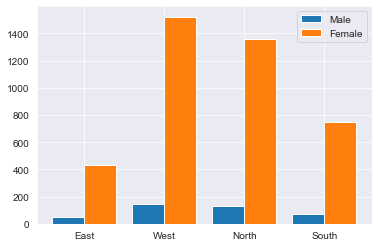

In [144]:
X = ['East','West','North','South']
Male = [50,142,131,70]
Female = [435,1523,1356,750]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Male, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, Female, 0.4, label = 'Female')
plt.xticks(X_axis, X)
plt.legend()
plt.show()

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='East', ylabel='Density'>

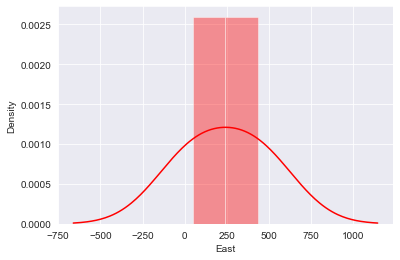

In [145]:
sns.distplot(data["East"],color="Red")

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='West', ylabel='Density'>

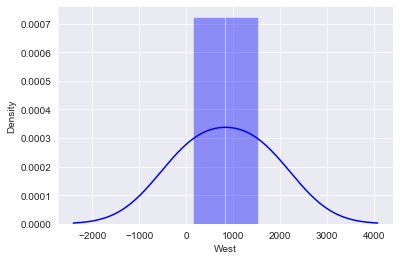

In [146]:
sns.distplot(data["West"],color="blue")

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='North', ylabel='Density'>

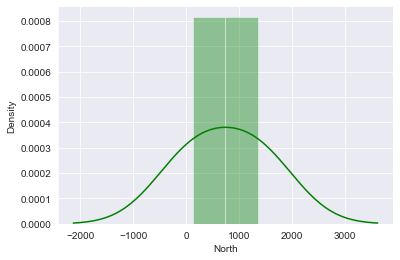

In [147]:
sns.distplot(data["North"],color="green")

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='South', ylabel='Density'>

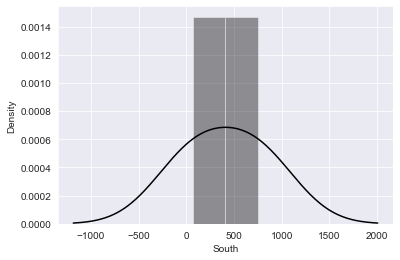

In [148]:
sns.distplot(data["South"],color="black")

In [149]:
# run chi-square test for independence
res = stat()
res.chisq(df=data)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            3       1.59595   0.660309
Log-likelihood     3       1.53541   0.674123



In [150]:
print(res.expected_df)


Expected frequency counts

        East      West     North     South
--  --------  --------  --------  --------
 0   42.7653   146.813   131.118   72.3042
 1  442.235   1518.19   1355.88   747.696



In [151]:
# using Pearson’s chi-squared statistic
# corrected for the Yates’ continuity
observed = np.array([[50, 142, 131, 70], [435, 1523, 1356, 750]])
chi_val, p_val, dof, expected =  chi2_contingency(observed)

chi_val, p_val, dof, expected

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [152]:
# without Yates’ correction for continuity
chi_val, p_val, dof, expected =  chi2_contingency(observed, correction=False)
chi_val, p_val, dof, expected

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [153]:
# for log-likelihood method 
chi_val, p_val, dof, expected =  chi2_contingency(observed, lambda_="log-likelihood")
chi_val, p_val, dof, expected

(1.5354067803116846,
 0.6741229013112389,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

Final Statement : as we can see above pvalue is greater than alpha hence we will fail to reject H0 (Null hypothesis) here.

pvalue > alpha => (0.66 > 0.05)

Accept H0 => The male-female buyer ratios are similar across the regions / All proportions are equal

# Costomer+OrderForm.csv

TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain % of the customer order forms. Any error in order form renders it defective and has to be reworked before processing. The manager wants to check whether the defective % varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

Answer: As per the problem statement above we will be using chi-square hypothesis test here, as the variables provided in the problem statement are Qualotative/Categorical.

Step 1 : Define the hypothesis : H0 hypothesis => the defective % does not vary by centre / the variables are independent Ha hypothesis => the defective % varies by centre / the variables are dependent

Step 2 : Here we will need to calculate t statistic value and critical value

Step 3 : We have alpha = 0.05 (5% significance level), if pvalue < alpha then we need to reject h0 (Null hypothesis) and if pvalue > alpha then we will fail to reject H0 means we will accept H0

In [154]:
orders = pd.read_csv("Costomer+OrderForm.csv")
orders

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [155]:
orders.dtypes

Phillippines    object
Indonesia       object
Malta           object
India           object
dtype: object

In [156]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [157]:
orders.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [158]:
#The count of Error Free and Defective for given 4 centers
table = [[271,267,269,280],[29,33,31,20]]
data1 = pd.DataFrame([
    [271,267,269,280],
    [29,33,31,20]], 
    index = ['Error Free', 'Defective'], columns = ['Phillippines', 'Indonesia', 'Malta', 'India'])
data1

,Phillippines,Indonesia,Malta,India
Error Free,271,267,269,280
Defective,29,33,31,20


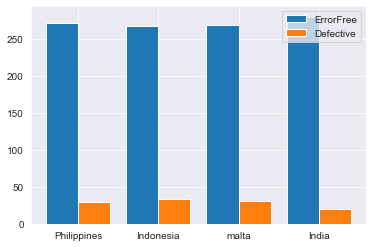

In [159]:
X = ['Philippines','Indonesia','malta','India']
ErrorFree = [271,267,269,280]
Defective= [29,33,31,20]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, ErrorFree , 0.4, label = 'ErrorFree')
plt.bar(X_axis + 0.2, Defective, 0.4, label = 'Defective')
plt.xticks(X_axis, X)
plt.legend()
plt.show()

In [160]:
# run chi-square test for independence
res = stat()
res.chisq(df=data1)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            3       3.85896   0.277102
Log-likelihood     3       4.08351   0.252587



In [161]:
print(res.expected_df)


Expected frequency counts

      Phillippines    Indonesia    Malta    India
--  --------------  -----------  -------  -------
 0          271.75       271.75   271.75   271.75
 1           28.25        28.25    28.25    28.25



Final Statement : Now if we analyse pvalue = 0.277 at 5% significance level (alpha = 0.05) we get pvlaue greater than alpha. Hence we will fail to reject H0 (Null Hypothesis)

pvalue > alpha (0.277 > 0.05)

Accept H0 => the defective % does not vary by centre / the variables are independent

# Cutlets.csv

A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

Answer: As per the problem statement above we will be using 2 sample 2 tail hypothesis test here as we have 2 samples provided in the problem statement.

Step 1 : Define the hypothesis : H0 hypothesis => There is no difference in the diameter of the cutlets of Unit A and B, Ha hypothesis => There is a significant difference in the diameter of the cutlets of Unit A and B

Step 2 : Since we have smaple data we will go for t-test here.

Step 3 : We have alpha = 0.05, if pvalue < alpha then we need to reject h0 (Null hypothesis) and if pvalue > alpha then we will fail to reject H0 means we will accept H0

In [162]:
cut = pd.read_csv("Cutlets.csv")
cut

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unit A', ylabel='Density'>

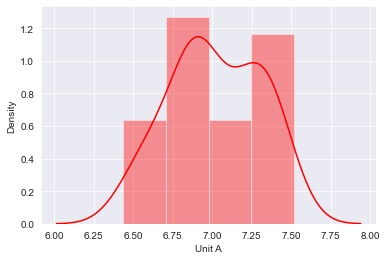

In [163]:
sns.distplot(cut["Unit A"],color="Red")

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unit B', ylabel='Density'>

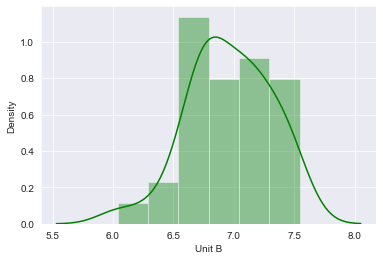

In [164]:
sns.distplot(cut["Unit B"],color="green")

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


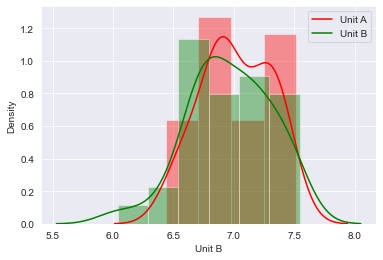

In [165]:
sns.distplot(cut["Unit A"],color="Red")
sns.distplot(cut["Unit B"],color="green")
plt.legend(['Unit A','Unit B'])

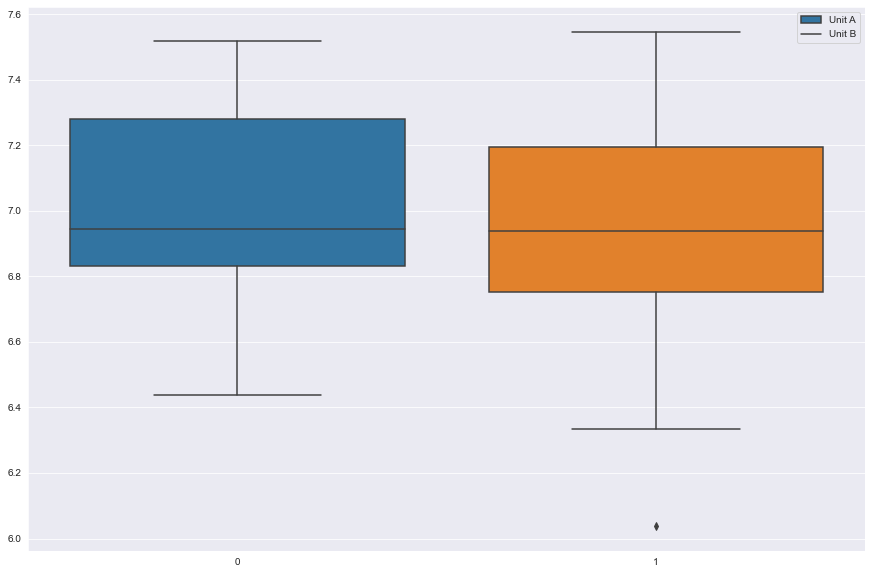

In [166]:
plt.figure(figsize=(15,10))
sns.boxplot(data=[cut['Unit A'],cut['Unit B']])
plt.legend(['Unit A','Unit B'])

In [167]:
unitA=pd.Series(cut.iloc[:,0])
unitA.head()

0    6.8090
1    6.4376
2    6.9157
3    7.3012
4    7.4488
Name: Unit A, dtype: float64

In [168]:
unitB=pd.Series(cut.iloc[:,1])
unitB.head()

0    6.7703
1    7.5093
2    6.7300
3    6.7878
4    7.1522
Name: Unit B, dtype: float64

In [169]:
# 2-sample 2-tail ttest:   stats.ttest_ind(array1,array2)     # ind -> independent samples
p_value=stats.ttest_ind(unitA,unitB)
p_value

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

Final Statement : as we can see above the pvalue we have got is 0.4722 which is greater then alpha valve we will fail to reject the Null hypothesis here

pvalue > alpha (0.4722 > 0.05)

Accept H0 => There is no difference in the diameter of the cutlets of Unit A and B

# LabTAT.csv

A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch. Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

Answer : As per the problem statement above we will be using Anova hypothesis test here as we have more than 2 sample's data in the problem statement provided. Suppose the Average TAT of Lab1 is μ1, Lab2 is μ2, Lab3 is μ3 & Lab4 is μ4

Step 1 : Define the hypothesis : H0 hypothesis => μ1 = μ2 = μ3 = μ4, Ha hypothesis => At least 1 Lab's Average TAT is different // Not all the averages are same

Step 2 : Since it's Anova Hypothesis test we will go with F-ratio here.

Step 3 : We have alpha = 0.05, if pvalue < alpha then we need to reject h0 (Null hypothesis) and if pvalue > alpha then we will fail to reject H0 means we will accept H0

In [170]:
lab = pd.read_csv("LabTAT.csv")
lab

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Laboratory 1', ylabel='Density'>

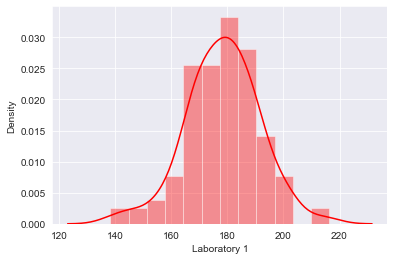

In [171]:
sns.distplot(lab["Laboratory 1"],color="Red")

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Laboratory 2', ylabel='Density'>

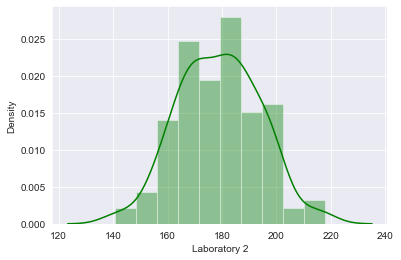

In [172]:
sns.distplot(lab["Laboratory 2"],color="green")

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Laboratory 3', ylabel='Density'>

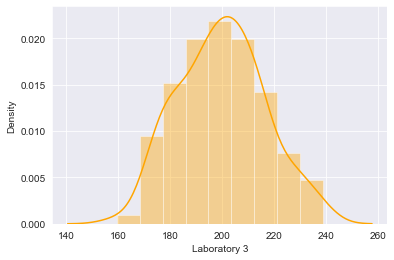

In [173]:
sns.distplot(lab['Laboratory 3'],color="orange")

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Laboratory 3', ylabel='Density'>

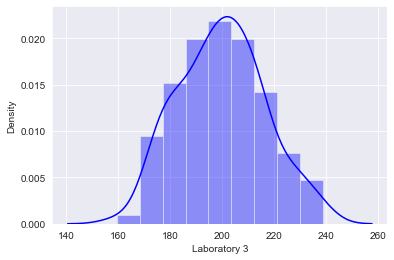

In [174]:
sns.distplot(lab['Laboratory 3'],color="blue")

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

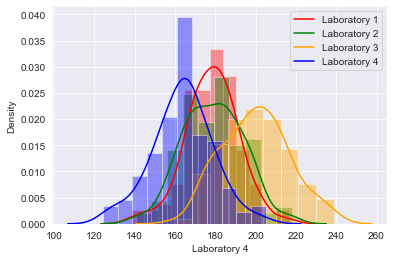

In [175]:
sns.distplot(lab["Laboratory 1"],color="Red")
sns.distplot(lab["Laboratory 2"],color="green")
sns.distplot(lab["Laboratory 3"],color="orange")
sns.distplot(lab["Laboratory 4"],color="blue")
plt.legend(['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])

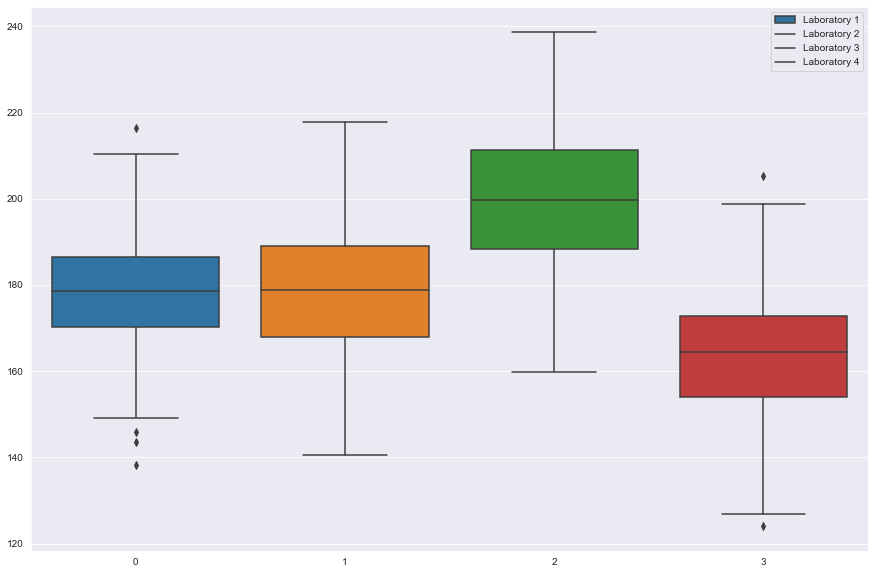

In [176]:
plt.figure(figsize=(15,10))
sns.boxplot(data=[lab['Laboratory 1'],lab['Laboratory 2'],lab['Laboratory 3'],lab['Laboratory 4']])
plt.legend(['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])

In [177]:
stats.f_oneway(lab.iloc[:,0], lab.iloc[:,1], lab.iloc[:,2], lab.iloc[:,3])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

Final Statement : as we can see above pvalue = 2.11 x 10 raise to -57 which is almost 0 and lesser than alpha value hence we reject H0 (Null hypothesis)

pvalue < alpha ( 2.11 x 10 raise to -57 < 0.05)

Accept Ha => At least 1 Lab's Average TAT is different // Not all the averages are same